In [ ]:
data_prepath = "../../data4dimensions/Prompts4dimensions/"
dimensions = ['action','color','scene','object_class','overall_consistency']

In [ ]:
# import os
# import base64
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# from io import BytesIO

# video = cv2.VideoCapture(r'D:\AStudying\AI\Niii_1\hopes\data4dimensions\overall_consistency\gen3\A cat wearing sunglasses at a pool_0.mp4')

# if not video.isOpened():
#     print(f"Error: Cannot open video file ")

# total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# fps = video.get(cv2.CAP_PROP_FPS)
# frames_to_skip = int(fps/8)
# print(f"Total frames: {total_frames}, FPS: {fps}, Frames to skip: {frames_to_skip}")
# base64Frames = []
# frames = []
# curr_frame=1
# end_frame = total_frames - 1
# # Loop through the video and extract frames at specified sampling rate
# while curr_frame < total_frames - 1:
#     video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
#     curr_frame += frames_to_skip
#     print(curr_frame)
#     success, frame = video.read()
#     if not success:
#         break
#     frames.append(frame)
#     if len(frames) == 8:
#         height, width, _ = frames[0].shape

#         # 创建一个空白图像用于网格
#         grid_image = np.zeros(( 2*height, 4 * width, 3))

#         # 将帧放置到网格中
#         for i in range(2):
#             for j in range(4):
#                 grid_image[i * height:(i + 1) * height, j * width:(j + 1) * width] = frames[i * 4 + j]

#         _, buffer = cv2.imencode(".jpg", grid_image)
#         base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
#         frames = []


# video.release()

# for idx, base64_image in enumerate(base64Frames):
#     # 解码 base64 编码的图片
#     img_data = base64.b64decode(base64_image)
#     np_arr = np.frombuffer(img_data, np.uint8)
#     img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

#     # 将图像转换为RGB格式
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     # 将图像转换为PIL格式
#     pil_img = Image.fromarray(img_rgb)

#     # 在Jupyter Notebook中显示图像
#     display(pil_img)

Total frames: 16, FPS: 8.0, Frames to skip: 4


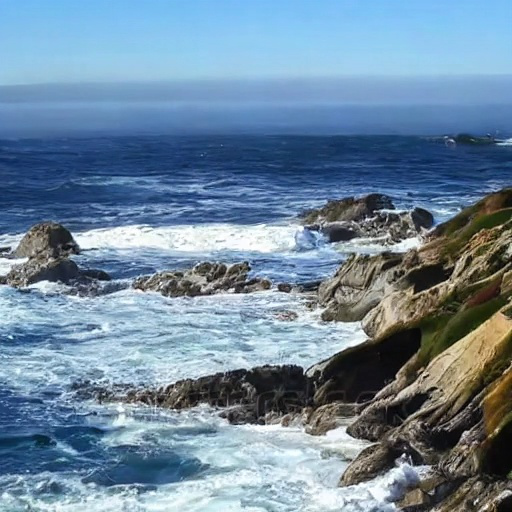

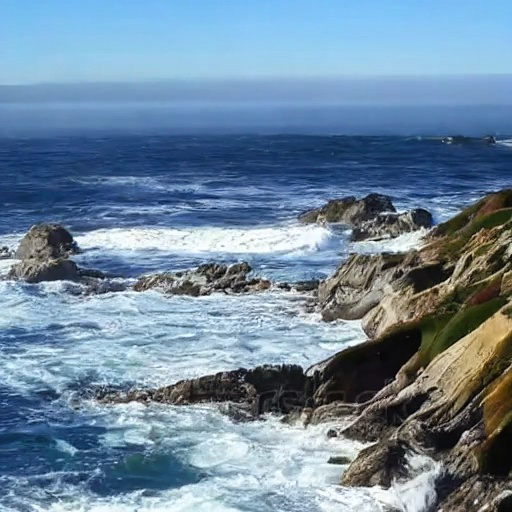

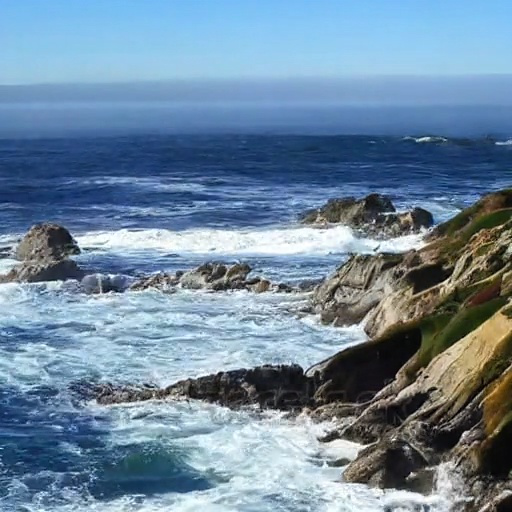

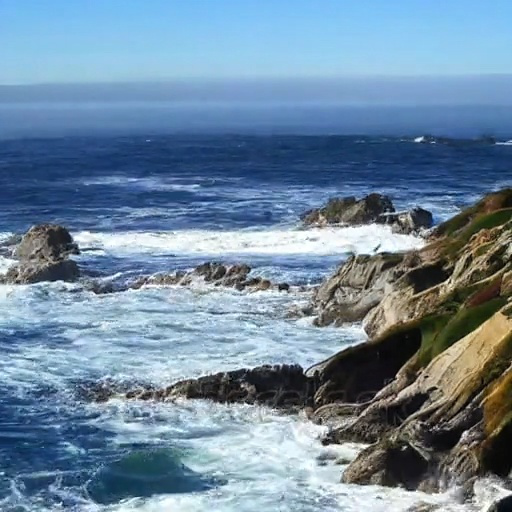

In [4]:
import os
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

video = cv2.VideoCapture("../../data4dimensions/overall_consistency/lavie/Pacific coast, carmel by the sea ocean and waves._0.mp4")

if not video.isOpened():
    print(f"Error: Cannot open video file ")

total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
fps = video.get(cv2.CAP_PROP_FPS)
frames_to_skip = int(fps/2)
print(f"Total frames: {total_frames}, FPS: {fps}, Frames to skip: {frames_to_skip}")
base64Frames = []
frames = []
curr_frame=1
end_frame = total_frames - 1
# Loop through the video and extract frames at specified sampling rate
while curr_frame < total_frames - 1:
    video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
    curr_frame += frames_to_skip
    success, frame = video.read()
    if not success:
        break

    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))



video.release()

for idx, base64_image in enumerate(base64Frames):
    # 解码 base64 编码的图片
    img_data = base64.b64decode(base64_image)
    np_arr = np.frombuffer(img_data, np.uint8)
    img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

    # 将图像转换为RGB格式
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 将图像转换为PIL格式
    pil_img = Image.fromarray(img_rgb)

    # 在Jupyter Notebook中显示图像
    display(pil_img)

In [2]:
import os
import base64

# 定义保存base64编码图片的函数
datapath = "./fewshot_examples/imaging_quality/"
for file in os.listdir(datapath):
    if file.endswith(".png") or file.endswith(".jpg"):
        image_path = datapath + file
        output_path = datapath + file.split(".")[0] + ".txt"
        with open(image_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
        with open(output_path, "w") as output_file:
            output_file.write(encoded_string)